<a href="https://colab.research.google.com/github/AldousSama/Tarea1/blob/main/Clima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2023-11-02 23:43:41--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.109.21, 52.217.117.120, 52.216.51.8, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.109.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  14.8MB/s    in 0.9s    

2023-11-02 23:43:43 (14.8 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [3]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")
with open(fname) as f:
   data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [4]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(",")[1:]]
  temperature[i] = values[1]
  raw_data[i, :] = values[:]



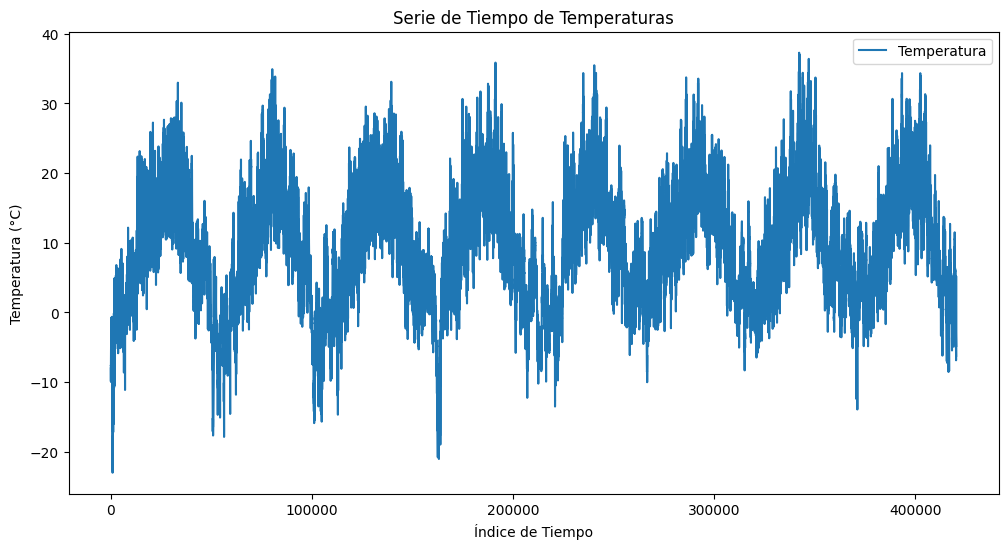

In [5]:
import matplotlib.pyplot as plt

# Suponiendo que 'temperature' contiene los datos de temperatura
plt.figure(figsize=(12, 6))
plt.plot(temperature, label='Temperatura')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Temperatura (°C)')
plt.title('Serie de Tiempo de Temperaturas')
plt.legend()
plt.show()


In [6]:
import numpy as np

# Define la longitud de las secuencias
sequence_length = 120

# Genera las secuencias y los objetivos
sequences = []
targets = []
for i in range(len(temperature) - sequence_length):
    sequences.append(temperature[i:i + sequence_length])
    targets.append(temperature[i + sequence_length])

# Convierte las listas a arrays NumPy
sequences = np.array(sequences)
targets = np.array(targets)

# Divide los datos en conjuntos de entrenamiento, validación y prueba (50% train, 25% val, 25% test)
split_train = int(0.5 * len(sequences))
split_val = int(0.75 * len(sequences))

x_train = sequences[:split_train]
y_train = targets[:split_train]

x_val = sequences[split_train:split_val]
y_val = targets[split_train:split_val]

x_test = sequences[split_val:]
y_test = targets[split_val:]

# Verifica las formas de los conjuntos de datos
print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de x_test:", x_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de x_train: (210165, 120)
Forma de y_train: (210165,)
Forma de x_val: (105083, 120)
Forma de y_val: (105083,)
Forma de x_test: (105083, 120)
Forma de y_test: (105083,)


In [7]:
!pip install tensorflow


In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define la arquitectura del modelo LSTM
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(120, 1)))
model.add(Dropout(0.2))  # Dropout para regularización
model.add(BatchNormalization())  # Batch Normalization para normalización
model.add(Dense(1))  # Capa de salida con 1 unidad para la predicción de temperatura

# Compila el modelo con el optimizador Adam y función de pérdida MSE
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Asegúrate de que tus datos tengan la forma adecuada (número de secuencias, longitud de la secuencia, características)
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_val_reshaped = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))

# Entrena el modelo con un tamaño de lote de 16 y 5 épocas
model.fit(x_train_reshaped, y_train, epochs=5, batch_size=10, validation_data=(x_val_reshaped, y_val))



Epoch 1/5
21017/21017 [==============================] - 986s 47ms/step - loss: 44.1465 - val_loss: 12.9804
Epoch 2/5
21017/21017 [==============================] - 1000s 48ms/step - loss: 22.7948 - val_loss: 7.6345
Epoch 3/5
21017/21017 [==============================] - 991s 47ms/step - loss: 19.9746 - val_loss: 3.9560
Epoch 4/5
21017/21017 [==============================] - 995s 47ms/step - loss: 18.0316 - val_loss: 1.2563
Epoch 5/5
21017/21017 [==============================] - 946s 45ms/step - loss: 13.6735 - val_loss: 0.7779
